In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import nltk

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
!pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fariyar","key":"d09d724a62c09f7fc07e59c17161d5cc"}'}

In [5]:
!mkdir ~/.kaggle


In [6]:
!cp kaggle.json ~/.kaggle/

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d nadyinky/sephora-products-and-skincare-reviews


Dataset URL: https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews
License(s): Attribution 4.0 International (CC BY 4.0)
 95% 139M/147M [00:00<00:00, 200MB/s]
100% 147M/147M [00:00<00:00, 191MB/s]


In [9]:
!unzip sephora-products-and-skincare-reviews.zip

Archive:  sephora-products-and-skincare-reviews.zip
  inflating: product_info.csv        
  inflating: reviews_0-250.csv       
  inflating: reviews_1250-end.csv    
  inflating: reviews_250-500.csv     
  inflating: reviews_500-750.csv     
  inflating: reviews_750-1250.csv    


In [10]:
import pandas as pd

df= pd.read_csv('reviews_0-250.csv')
df = df.drop(columns=['Unnamed: 0','author_id', 'is_recommended', 'helpfulness', 'total_feedback_count',
                      'total_neg_feedback_count', 'total_pos_feedback_count', 'submission_time',
                     'review_title', 'skin_tone', 'eye_color', 'skin_type',
                      'hair_color', 'product_id', 'product_name', 'price_usd'])


df.head(10)

,rating,review_text,brand_name
0,5,I use this with the Nudestix “Citrus Clean Bal...,NUDESTIX
1,1,I bought this lip mask after reading the revie...,LANEIGE
2,5,My review title says it all! I get so excited ...,LANEIGE
3,5,I’ve always loved this formula for a long time...,LANEIGE
4,5,"If you have dry cracked lips, this is a must h...",LANEIGE
5,4,The scent isn’t my favourite but it works grea...,LANEIGE
6,2,I’ll give this 2 stars for nice packaging and ...,LANEIGE
7,5,I use this at night or while I’m putting makeu...,LANEIGE
8,5,I love this stuff. I first had the sample size...,LANEIGE
9,5,I purchased the Sweet Candy scent at my local ...,LANEIGE


In [11]:
# First, map the 'rating' to the desired labels
df['label'] = df['rating'].apply(lambda x: 0 if x in [1,2] else (1 if x == 3 else 2))
# Check the result
df.head()


,rating,review_text,brand_name,label
0,5,I use this with the Nudestix “Citrus Clean Bal...,NUDESTIX,2
1,1,I bought this lip mask after reading the revie...,LANEIGE,0
2,5,My review title says it all! I get so excited ...,LANEIGE,2
3,5,I’ve always loved this formula for a long time...,LANEIGE,2
4,5,"If you have dry cracked lips, this is a must h...",LANEIGE,2


In [12]:
df.label.value_counts()

,count
label,
2,495956
0,62156
1,44018


In [13]:
df2 = pd.read_csv('reviews_250-500.csv')
df2['label'] = df2['rating'].apply(lambda x: 0 if x in [1, 2] else (1 if x == 3 else 2))
df2 = df2.drop(columns=['Unnamed: 0','author_id', 'is_recommended', 'helpfulness', 'total_feedback_count',
                      'total_neg_feedback_count', 'total_pos_feedback_count', 'submission_time',
                     'review_title', 'skin_tone', 'eye_color', 'skin_type',
                      'hair_color', 'product_id', 'product_name', 'price_usd'])


df2.head()

,rating,review_text,brand_name,label
0,2,Used to swear by this product but hate the sme...,The INKEY List,0
1,5,I’ve only been using this for a week and my sk...,The INKEY List,2
2,1,"Why, why, why would you change the formula?!!!...",The INKEY List,0
3,1,I have used this product for years and it has ...,The INKEY List,0
4,5,Great product for anti-aging Also great for da...,The INKEY List,2


In [14]:
df3 = pd.read_csv('reviews_500-750.csv')
df3['label'] = df3['rating'].apply(lambda x: 0 if x in [1, 2] else (1 if x == 3 else 2))
df3= df3.drop(columns=['Unnamed: 0','author_id', 'is_recommended', 'helpfulness', 'total_feedback_count',
                      'total_neg_feedback_count', 'total_pos_feedback_count', 'submission_time',
                     'review_title', 'skin_tone', 'eye_color', 'skin_type',
                      'hair_color', 'product_id', 'product_name', 'price_usd'])
df3.head()

,rating,review_text,brand_name,label
0,5,These are the only pimple patches I’ve used th...,Dr. Jart+,2
1,4,One of my ingrown hair turned inflamed and sor...,Dr. Jart+,2
2,5,I have tried 10 different acne/blemish patches...,Dr. Jart+,2
3,4,"Love these for my mid-size breakouts, specifyi...",Dr. Jart+,2
4,4,Best so far - though still not particularly ef...,Dr. Jart+,2


In [15]:
df4 = pd.read_csv('reviews_750-1250.csv')
df4['label'] = df4['rating'].apply(lambda x: 0 if x in [1, 2] else (1 if x == 3 else 2))
df4= df4.drop(columns=['Unnamed: 0','author_id', 'is_recommended', 'helpfulness', 'total_feedback_count',
                      'total_neg_feedback_count', 'total_pos_feedback_count', 'submission_time',
                     'review_title', 'skin_tone', 'eye_color', 'skin_type',
                      'hair_color', 'product_id', 'product_name', 'price_usd'])
df4.head()

,rating,review_text,brand_name,label
0,2,This was gifted by Supergoop! in exchange for ...,Supergoop!,0
1,2,I didn’t like it; too much product comes out w...,Supergoop!,0
2,5,Y’all….I’m begging for everyone to read instru...,Supergoop!,2
3,1,I have not figured out how to use this product...,Supergoop!,0
4,1,I’m at a loss as to how to use this thing!!! C...,Supergoop!,0


In [16]:
df5 = pd.read_csv('reviews_1250-end.csv')
df5['label'] = df5['rating'].apply(lambda x: 0 if x in [1, 2] else (1 if x == 3 else 2))
df5= df5.drop(columns=['Unnamed: 0','author_id', 'is_recommended', 'helpfulness', 'total_feedback_count',
                      'total_neg_feedback_count', 'total_pos_feedback_count', 'submission_time',
                     'review_title', 'skin_tone', 'eye_color', 'skin_type',
                      'hair_color', 'product_id', 'product_name', 'price_usd'])
df5.head()

,rating,review_text,brand_name,label
0,5,I absolutely L-O-V-E this oil. I have acne pro...,Clarins,2
1,3,I gave this 3 stars because it give me tiny li...,Clarins,1
2,5,Works well as soon as I wash my face and pat d...,Clarins,2
3,5,"this oil helped with hydration and breakouts, ...",Clarins,2
4,5,This is my first product review ever so that s...,Clarins,2


In [17]:
# concatenate df2 and df3
df_concat = pd.concat([df,df2,df3,df4,df5], axis = 0)

# get only neutral labels which we are short of'

df_neut = df_concat[df_concat['label'] == 1]
df_neut.label.value_counts()

,count
label,
1,81816


In [18]:
df = df_concat
print("Positive labels percentage", round(df.label.value_counts()[2]/len(df) *100 ,2), "%")
print("Neutral labels percentage", round(df.label.value_counts()[1]/len(df) *100 ,2), "%")
print("Negative labels percentage", round(df.label.value_counts()[0]/len(df) *100 ,2), "%")

Positive labels percentage 82.08 %
Neutral labels percentage 7.48 %
Negative labels percentage 10.44 %


In [19]:
df_neut = df[df['label'] == 1]
df_pos = df[df['label'] == 2].sample(len(df_neut)) # samples a number of rows equal to the length of df_neg
df_neg = df[df['label'] == 0].sample(len(df_neut))

In [20]:
df_neg.label.value_counts()

,count
label,
0,81816


In [21]:
df_pos.label.value_counts()

,count
label,
2,81816


In [22]:
df = pd.concat([df_pos, df_neg,df_neut], axis = 0)
df = shuffle(df)
df.head()

,rating,review_text,brand_name,label
57847,1,Pls save your money. This product wasn’t even ...,TAN-LUXE,0
14972,3,I have combination/oily skin that tends to be ...,Dermalogica,1
233418,3,I like this product but i wasn’t blown away by...,Tatcha,1
500594,3,"It does not melt well. After rinsing, it alway...",Drunk Elephant,1
382491,4,Primarily bought this because of the clean sta...,Biossance,2


In [23]:
# Mapping dictionary for label names
label_name_mapping = {0: 'negative', 1: 'neutral', 2: 'positive'}

# Create the 'label_name' column by mapping the 'label' column
df['label_name'] = df['label'].map(label_name_mapping)

# Check the result
df.head()

,rating,review_text,brand_name,label,label_name
57847,1,Pls save your money. This product wasn’t even ...,TAN-LUXE,0,negative
14972,3,I have combination/oily skin that tends to be ...,Dermalogica,1,neutral
233418,3,I like this product but i wasn’t blown away by...,Tatcha,1,neutral
500594,3,"It does not melt well. After rinsing, it alway...",Drunk Elephant,1,neutral
382491,4,Primarily bought this because of the clean sta...,Biossance,2,positive


In [24]:
print("Positive labels percentage", round(df.label.value_counts()[2]/len(df) *100 ,2), "%")
print("Negative labels percentage", round(df.label.value_counts()[0]/len(df) *100 ,2), "%")
print("Neutral labels percentage", round(df.label.value_counts()[1]/len(df) *100 ,2), "%")

Positive labels percentage 33.33 %
Negative labels percentage 33.33 %
Neutral labels percentage 33.33 %


# **Text Preprocessing**

In [25]:
import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer
from nltk.stem import PorterStemmer

def preprocess_text(text, remove_digits=True):
    # Removing HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Removing square brackets
    text = re.sub('\[[^]]*\]', '', text)

    # Removing special characters
    if remove_digits:
        text = re.sub('[^a-zA-Z\s]', '', text)
    else:
        text = re.sub('[^a-zA-Z0-9\s]', '', text)

    # Lowercasing
    text = text.lower()

    # Stemming
    ps = PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])

    # Removing stopwords
    stopword_list = set(stopwords.words('english'))
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)

    return filtered_text

In [26]:
import matplotlib.pyplot as plt


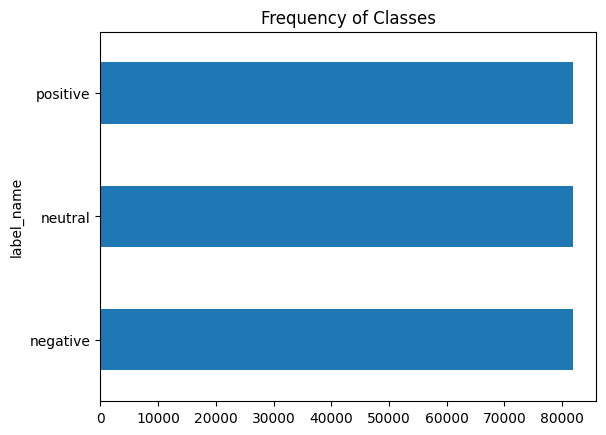

In [27]:
label_counts = df['label_name'].value_counts(ascending= True)
label_counts.plot.barh()
plt.title("Frequency of Classes")
plt.show()
# Create

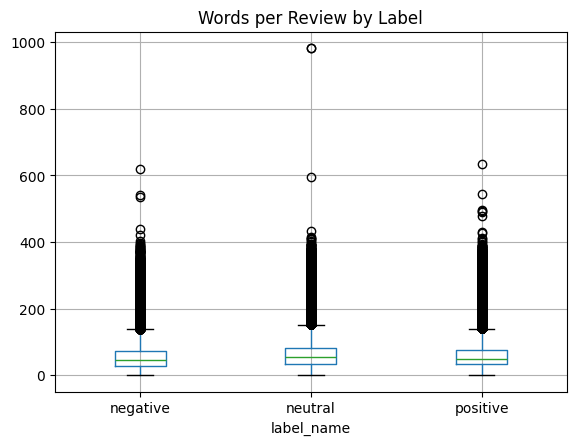

In [28]:
df['Words per review'] = df['review_text'].fillna('').str.split().apply(len)

# Plot the boxplot
df.boxplot("Words per review", by="label_name")
plt.title("Words per Review by Label")
plt.suptitle("")  # Suppress the default title
plt.show()

In [29]:
train_df, test_df = train_test_split(df, random_state =42, test_size = 0.10, shuffle = True)

train_df , val_df = train_test_split(train_df, test_size=0.25, random_state= 42)

Gemini LLM

In [30]:
!pip install google-generativeai

In [31]:
import google.generativeai as genai

from google.colab import userdata

gemini_key=userdata.get('gemini_key')

genai.configure(api_key=gemini_key)

In [32]:
genai_model = genai.GenerativeModel('gemini-pro')

Few Shot

In [41]:

def get_few_shot_examples(df, num_examples=25):
    # Select a few random examples and convert them to a list of dictionaries
    few_shot_examples = df[['review_text', 'label']].sample(num_examples).to_dict(orient='records')

    # Map numeric labels to their corresponding text format
    for example in few_shot_examples:
        if example['label'] == 2:
            example['label'] = 'Positive'
        elif example['label'] == 1:
            example['label'] = 'Neutral'
        elif example['label'] == 0:
            example['label'] = 'Negative'

    return few_shot_examples

# Usage example
few_shot_examples = get_few_shot_examples(df, num_examples=25)

# Print the output
print("Few-Shot Examples:\n")
for i, example in enumerate(few_shot_examples, start=1):
    print(f"Example {i}:")
    print(f"  Review Text: {example['review_text']}")
    print(f"  Sentiment Label: {example['label']}\n")


Few-Shot Examples:

Example 1:
  Review Text: I love all DE products, and love the C-Tango eye cream. So I figured what could go wrong with buying another eye cream from this brand.. However, I was pretty disappointed with the consistency with this eye cream. I like a thick eye cream that absorbs well, and this is neither of those things. I will continue to try it, but so far not so good. Save your 60 bucks for a different DE product.
  Sentiment Label: Neutral

Example 2:
  Review Text: I am still using the sample Clinique medicated bar to wash my face. I really like how smooth and non-oily my face feels after washing with the soap. I generally have a really oily complexion; I notice much less oil made evident by a shiny face every since I started using the product. I have mild acne, but have fewer breakouts now. It is good for both treatment and prevention. Buy the exfoliant and moisturizer to incorporate into your regimen to really take care of your skin.
  Sentiment Label: Positive

In [42]:
def analyze_sentiment(few_shot_examples, new_sentence):
    """
    Analyzes the sentiment of a new sentence using few-shot examples.

    Args:
        few_shot_examples (list): A list of dictionaries, each containing 'review_text' and 'label' keys.
        new_sentence (str): The new sentence for which we want a sentiment prediction.

    Returns:
        str: A formatted string with the new sentence and its predicted sentiment.
    """
    # Create the prompt for the model
    prompt = "Tell me if the sentiment of the sentence is Positive, Neutral, or Negative on the basis of the ratings\n"

    # Add few-shot examples to the prompt
    for example in few_shot_examples:
        sentence = example['review_text']
        category = example['label']  # Expected values: 'Positive', 'Neutral', 'Negative'
        prompt += f"Sentence: {sentence}\nCategory: {category}\n\n"

    # Add the new sentence to be classified
    prompt += f"Sentence: {new_sentence}\nCategory:"

    # Generate prediction from the model
    prediction = genai_model.generate_content(prompt)

    # Format the output
    result = f"Analyzed Sentence: '{new_sentence}'\nPredicted Sentiment: {prediction.text.strip()}"

    return result

# Example usage
new_sentence = "I don't like or dislike this product"
result = analyze_sentiment(few_shot_examples, new_sentence)
print(result)


Analyzed Sentence: 'I don't like or dislike this product'
Predicted Sentiment: Neutral


In [43]:
import pandas as pd
import time

def dynamic_accuracy(df, model, num_examples=25):
    """
    Calculates the accuracy of the sentiment analysis model on a sample of the actual data,
    with rate limiting and retry logic, and prints the examples used with actual and predicted labels.

    Args:
        df (pd.DataFrame): The DataFrame containing 'review_text' and 'label' columns.
        model: The sentiment analysis model used for predictions.
        num_examples (int): The number of examples to sample from the dataset.

    Returns:
        float: The accuracy of the model as a percentage.
    """
    # Sample the data
    sampled_data = df.sample(num_examples)

    # Extract actual labels
    true_labels = sampled_data['label'].tolist()
    true_labels_text = [
        'Positive' if label == 2  else 'Neutral' if label == 1 else 'Negative'
        for label in true_labels
    ]

    # Prepare for predictions
    predictions = []
    examples_with_labels = []

    # Make predictions using the model with retry logic
    for review, true_label in zip(sampled_data['review_text'], true_labels_text):
        prompt = create_prompt(get_few_shot_examples(df), review)
        attempt = 0
        while attempt < 3:  # Try up to 3 times
            try:
                prediction = model.generate_content(prompt)
                predicted_label = prediction.text.strip()
                predictions.append(predicted_label)
                examples_with_labels.append((review, true_label, predicted_label))
                break  # Break if the request is successful
            except Exception as e:
                print(f"Error encountered: {e}")
                if "TooManyRequests" in str(e):
                    attempt += 1
                    wait_time = 2 ** attempt  # Exponential backoff
                    print(f"Rate limit hit. Waiting for {wait_time} seconds...")
                    time.sleep(wait_time)  # Wait before retrying
                else:
                    print("An unexpected error occurred.")
                    predictions.append("Unknown")  # Handle unexpected errors gracefully
                    examples_with_labels.append((review, true_label, "Unknown"))
                    break

    # Calculate accuracy
    correct_predictions = sum(1 for true, pred in zip(true_labels_text, predictions) if true == pred)
    accuracy = (correct_predictions / num_examples) * 100  # Convert to percentage

    # Print examples used with actual and predicted labels
    print("\nExamples Used for Prediction:")
    for review, true_label, predicted_label in examples_with_labels:
        print(f"Review: {review}\nActual Label: {true_label}\nPredicted Label: {predicted_label}\n")

    return accuracy

# Example Usage
accuracy = dynamic_accuracy(df, genai_model, num_examples=15)
print(f"Accuracy of the sentiment analyzer: {accuracy:.2f}%")



Examples Used for Prediction:
Review: I expected a lot for this product, but it really didn’t do more than a $7 mask could do
Actual Label: Negative
Predicted Label: Neutral

Review: I wanted to love this oil, bit this is not what I had expected for $80. The oil just sat on my face and didn’t absorb. I used it for about 3 months and didn’t notice any difference. Won’t be buying again.
Actual Label: Negative
Predicted Label: Negative

Review: Would not recommend for sensitive skin !!!!
Actual Label: Negative
Predicted Label: Negative

Review: I like it! It’s different from other essences I’ve tried in that, it exfoliates and primes the skin for skincare. I’ve been using this for about a week and the first day I noticed my skin looked a little brighter. My pores are smaller and my skin definitely looks brighter after a full week of use. My skin is normal, not really dry or oily and this product works fine for me. I do use a rich moisturizer and have found light peeling around my nose.. 

In [52]:
from sklearn.metrics import precision_recall_fscore_support
import time

def dynamic_evaluation_metrics(df, model, num_examples=25):
    """
    Calculates the precision, recall, F1 score, and support of the sentiment analysis model
    on a sample of the actual data, with rate limiting and retry logic.

    Args:
        df (pd.DataFrame): The DataFrame containing 'review_text' and 'label' columns.
        model: The sentiment analysis model used for predictions.
        num_examples (int): The number of examples to sample from the dataset.

    Returns:
        dict: A dictionary containing precision, recall, F1 score, and support for each class.
    """
    # Sample the data
    sampled_data = df.sample(num_examples)

    # Extract actual labels
    true_labels = sampled_data['label'].tolist()
    true_labels_text = [
        'Positive' if label == 2 else 'Neutral' if label == 1 else 'Negative'
        for label in true_labels
    ]

    # Prepare for predictions
    predictions = []

    # Make predictions using the model with retry logic
    for review in sampled_data['review_text']:
        prompt = create_prompt(get_few_shot_examples(df), review)
        attempt = 0
        while attempt < 3:  # Try up to 3 times
            try:
                prediction = model.generate_content(prompt)
                predicted_label = prediction.text.strip()
                predictions.append(predicted_label)
                break  # Break if the request is successful
            except Exception as e:
                print(f"Error encountered: {e}")
                if "TooManyRequests" in str(e):
                    attempt += 1
                    wait_time = 2 ** attempt  # Exponential backoff
                    print(f"Rate limit hit. Waiting for {wait_time} seconds...")
                    time.sleep(wait_time)  # Wait before retrying
                else:
                    predictions.append("Unknown")  # Handle unexpected errors gracefully
                    break

    # Map text labels to numerical values for calculating metrics
    label_mapping = {'Positive': 2, 'Neutral': 1, 'Negative': 0}
    true_labels_num = [label_mapping[label] for label in true_labels_text]
    predicted_labels_num = [label_mapping.get(label, -1) for label in predictions]  # -1 for unknowns

    # Calculate precision, recall, F1-score, and support
    precision, recall, f1_score, support = precision_recall_fscore_support(
        true_labels_num, predicted_labels_num, labels=[0, 1, 2], zero_division=0
    )

    # Store metrics in a dictionary
    metric_results = {
        'Negative': {'precision': precision[0], 'recall': recall[0], 'f1_score': f1_score[0], 'support': support[0]},
        'Neutral': {'precision': precision[1], 'recall': recall[1], 'f1_score': f1_score[1], 'support': support[1]},
        'Positive': {'precision': precision[2], 'recall': recall[2], 'f1_score': f1_score[2], 'support': support[2]},
    }

    # Print metrics
    print("\nEvaluation Metrics:")
    for sentiment, metrics in metric_results.items():
        print(f"{sentiment} - Precision: {metrics['precision']:.2f}, Recall: {metrics['recall']:.2f}, "
              f"F1 Score: {metrics['f1_score']:.2f}, Support: {metrics['support']}")

    return metric_results

# Example Usage
metrics = dynamic_evaluation_metrics(df, genai_model, num_examples=15)



Evaluation Metrics:
Negative - Precision: 0.78, Recall: 1.00, F1 Score: 0.88, Support: 7
Neutral - Precision: 1.00, Recall: 0.60, F1 Score: 0.75, Support: 5
Positive - Precision: 1.00, Recall: 1.00, F1 Score: 1.00, Support: 3


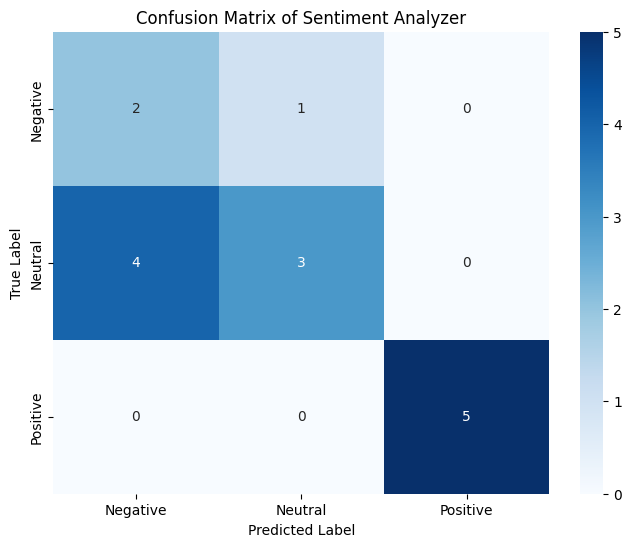

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(df, model, num_examples=25):
    """
    Generates and displays a confusion matrix for the sentiment analysis model
    on a sample of the actual data, with rate limiting and retry logic.

    Args:
        df (pd.DataFrame): The DataFrame containing 'review_text' and 'label' columns.
        model: The sentiment analysis model used for predictions.
        num_examples (int): The number of examples to sample from the dataset.
    """
    # Sample the data
    sampled_data = df.sample(num_examples)

    # Extract actual labels
    true_labels = sampled_data['label'].tolist()
    true_labels_text = [
        'Positive' if label == 2 else 'Neutral' if label == 1 else 'Negative'
        for label in true_labels
    ]

    # Prepare for predictions
    predictions = []

    # Make predictions using the model with retry logic
    for review in sampled_data['review_text']:
        prompt = create_prompt(get_few_shot_examples(df), review)
        attempt = 0
        while attempt < 3:  # Try up to 3 times
            try:
                prediction = model.generate_content(prompt)
                predicted_label = prediction.text.strip()
                predictions.append(predicted_label)
                break  # Break if the request is successful
            except Exception as e:
                print(f"Error encountered: {e}")
                if "TooManyRequests" in str(e):
                    attempt += 1
                    wait_time = 2 ** attempt  # Exponential backoff
                    print(f"Rate limit hit. Waiting for {wait_time} seconds...")
                    time.sleep(wait_time)  # Wait before retrying
                else:
                    predictions.append("Unknown")  # Handle unexpected errors gracefully
                    break

    # Map text labels to numerical values
    label_mapping = {'Positive': 2, 'Neutral': 1, 'Negative': 0}
    true_labels_num = [label_mapping[label] for label in true_labels_text]
    predicted_labels_num = [label_mapping.get(label, -1) for label in predictions]  # -1 for unknowns

    # Calculate confusion matrix
    cm = confusion_matrix(true_labels_num, predicted_labels_num, labels=[0, 1, 2])

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix of Sentiment Analyzer")
    plt.show()

# Example Usage
plot_confusion_matrix(df, genai_model, num_examples=15)
